<a href="https://colab.research.google.com/github/eunzzae/PJT_fc_customer_analysis/blob/main/%EC%9D%B4%EC%BB%A4%EB%A8%B8%EC%8A%A4_%EA%B3%A0%EA%B0%9D_%EC%84%B8%EB%B6%84%ED%99%94_RFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rc
import seaborn as sns

font_list = [font.name for font in fm.fontManager.ttflist]
font_list.sort()
font_list
plt.rcParams['font.family'] = 'NanumGothic'
# plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.cluster import KMeans
from yellowbrick.cluster.elbow import kelbow_visualizer
from yellowbrick.cluster import silhouette_visualizer
from sklearn.preprocessing import RobustScaler

from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.10/dist-packages/yellowbrick/style/colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
/usr/local/lib/python3.10/dist-packages/yellowbrick/style/rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
/usr/local/lib/python3.10/dist-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [5]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

# 이커머스 데이터 활용 지표 개발
>**목차**

* 문제상황 및 데이터 살펴보기  
* 문제해결 프로세스 정의  
1) 서비스 이용형태 탐색  
2) 지표기획 및 데이터 추출  
3) RFM 활용 서비스 이용 수준 측정

# 문제상황 및 데이터 살펴보기  
---
>**시나리오**

```
F사는 온라인교육 플랫폼을 운영 중이다. 런칭 이후 사용자들이 빠르게 상승하였지만, 현재는 정체기에 빠져있다. 현재 서비스 이용 수준이  
어떻게 되고 있으며 런칭 이후 어떻게 변해왔는지를 파악하기 위해 다양한 분석을 수행하고자 한다.

```  

>**데이터 살펴보기**

* 이커머스 온라인 구매 데이터
* 데이터 명세

|거래ID|유형|고객ID|코스ID|사이트|포맷|
|:---:|:---:|:---:|:---:|:---:|:---:|
|거래고유ID|결제(Payment) 또는 환불(Refund)|고객식별ID|코스식별ID|모두 동일데이터|올인원 또는 RED|

|카테고리|코스(상품이름)|거래일자|쿠폰이름|판매가격|결제수단|
|:---:|:---:|:---:|:---:|:---:|:---:|
|해당 상품의 카테고리|사용자가 거래한 코스이름|YYYY.MM.DD.오전/오후 HH:MM:SS형태|사용자가 사용한 쿠폰이름|상품의 판매가격|결제 수단명|

|실거래금액|쿠폰할인액|거래금액|환불금액|
|:---:|:---:|:---:|:---:|
|실제 거래로 발생한 금액|쿠폰에 할인 받은 금액|사용자가 지불한 금액|사용자가 환불한 금액|


# 문제해결 프로세스 정의
---
>**문제정의**

```
- 서비스 정체기로 인한 영업이익, 사용 고객 수 감소
```

>**기대효과**

```
- 정체 원인 파악 및 대응책 수립 및 실행을 통한 영업이익, 사용 고객 수 증가
```

>**해결방안**

```
- 구매데이터 활용 서비스 이용 현황 파악(지표 기획)
1) 다양한 Data 전처리
2) RFM 모델에 대한 이해와 각 지표 설정 방법
3) RFM 활용 서비스 지표 기획 및 개발
```

>**성과측정**

```
- 지표 활용 서비스 사용 현황 파악
```

>**현업적용**

```
- 지표 활용 데이터 인사이트 리포트 발행
- 개발된 지표 활용 대시보드(BI tool활용) 개발 후 모니터링 및 이슈 확인
```

In [6]:
# ▶ Warnings 제거
import warnings
warnings.filterwarnings('ignore')

# ▶ Google drive mount or 폴더 클릭 후 구글드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# ▶ 경로 설정 (※ Colab을 활성화시켰다면 보통 Colab Notebooks 폴더가 자동 생성)
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/[플젝] 데이터분석/mini_PJT/data_fastcampus')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/Colab Notebooks/[플젝] 데이터분석/mini_PJT/data_fastcampus'

In [7]:
# Data read
import pandas as pd
pd.set_option('display.max_columns', 500)
bath = '/content/drive/MyDrive/Colab Notebooks/data/fastcampus/'
df = pd.read_csv(bath + 'fc_purchase.csv')

## Session 0
## 데이터 탐색

### Data 확인
---

In [8]:
# Data shape
# 159,328 rows, 16 cols 구성
df.shape

(159328, 16)

In [9]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159328 entries, 0 to 159327
Data columns (total 16 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   거래id       159328 non-null  int64 
 1   유형         159328 non-null  object
 2   고객id       159328 non-null  int64 
 3   코스ID       159328 non-null  int64 
 4   사이트        159328 non-null  object
 5   포맷         159328 non-null  object
 6   카테고리       159328 non-null  object
 7   코스(상품) 이름  159328 non-null  object
 8   거래일자       159328 non-null  object
 9   쿠폰이름       159328 non-null  object
 10  판매가격       159328 non-null  object
 11  결제수단       159328 non-null  object
 12  실거래금액      159328 non-null  int64 
 13  쿠폰할인액      159328 non-null  object
 14  거래금액       159328 non-null  object
 15  환불금액       159328 non-null  object
dtypes: int64(4), object(12)
memory usage: 19.4+ MB


In [10]:
# Null 확인
df.isnull().sum()

거래id         0
유형           0
고객id         0
코스ID         0
사이트          0
포맷           0
카테고리         0
코스(상품) 이름    0
거래일자         0
쿠폰이름         0
판매가격         0
결제수단         0
실거래금액        0
쿠폰할인액        0
거래금액         0
환불금액         0
dtype: int64

In [11]:
df['쿠폰할인액'] = df['쿠폰할인액'].replace('-',0).astype(int)
df['거래금액'] = df['거래금액'].replace('-',0).astype(int)
df['환불금액'] = df['환불금액'].replace('-',0).astype(int)
df['판매가격'] = df['판매가격'].replace('-',0).astype(int)

<Axes: xlabel='실거래금액', ylabel='Density'>

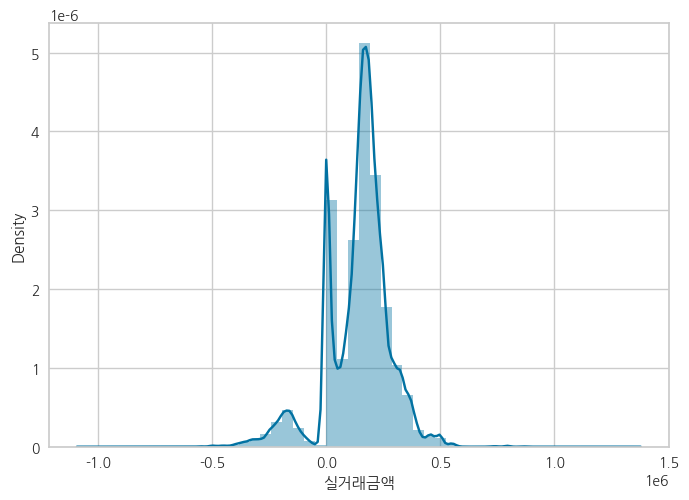

In [12]:
# distplot 활용 음수 데이터 분포 확인
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.distplot(df['실거래금액'])

<Axes: xlabel='환불금액', ylabel='Density'>

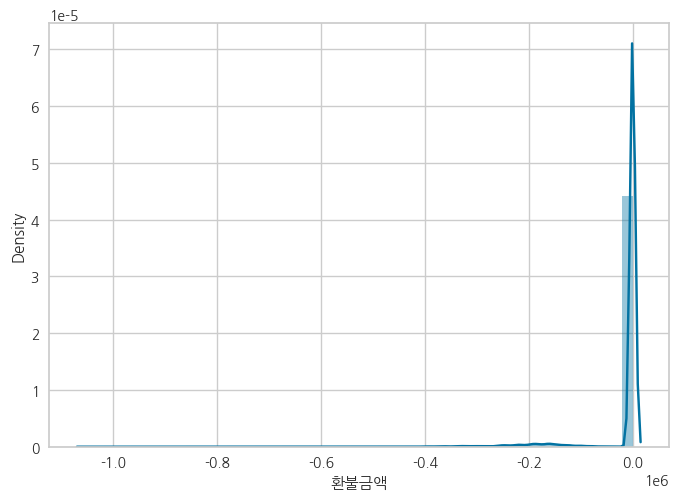

In [13]:
# distplot 활용 음수 데이터 분포 확인
sns.distplot(df['환불금액'])

In [14]:
# 실거래금액이 음수인 값 확인 -> 환불고객
refund_df = df[df['실거래금액']<0]
len(refund_df)/159328*100

7.005673830086363

* 전체 환불률 7%

In [15]:
# 이용 고객수(79,615명), 이용 코스 품목수(407건), 이용 카테고리(11건)
df['고객id'].nunique(), df['코스ID'].nunique(), df['카테고리'].nunique()

(79615, 407, 11)

In [16]:
# 인당 평균 구매건수(2.00건)
df.groupby('고객id')['거래id'].count().mean()

2.001230923820888

### 데이터 전처리
---

#### 거래일자

In [17]:
# 거래날짜 전처리
# object를 datetime으로 타입 변환
from datetime import datetime

df['거래일자']=df['거래일자'].str.replace('오전','AM')
df['거래일자']=df['거래일자'].str.replace('오후','PM')

# 띄어쓰기 제거
df['거래일자'] = df['거래일자'].str.replace(' ', '')

# slicing 사용해서 거래일자에서 날짜 데이터만 추출

def extract_date(date_string):
  if '오전' in date_string:
    return date_string.split('오전')[0].strip()
  elif '오후' in date_string:
    return date_string.split('오후')[0].strip()
  else:
    return date_string

df['거래날짜'] = df['거래일자'].apply(extract_date)

df['거래날짜'] = pd.to_datetime(df['거래날짜'], format='%Y.%m.%d.%p%I:%M:%S')

In [18]:
# 거래날짜에서 거래월만 추출
df['거래월']=df['거래날짜'].dt.month.astype(int)

#### 쿠폰사용

In [19]:
# 쿠폰사용여부 컬럼 생성 0, 1
df['쿠폰사용'] = df['쿠폰이름'].apply(lambda x: 1 if x != '-' else 0)

#### 할인

In [20]:
# 판매가격 대비 쿠폰할인액
df['할인율']= round(df['쿠폰할인액']/df['판매가격']*100,1)
df['할인율'].fillna(0, inplace=True)

In [21]:
# 불필요한 컬럼 drop
df = df.drop(columns=['유형','사이트','코스(상품) 이름','거래일자'])

# 컬럼명 순서 변경
new = ['거래id','고객id','코스ID','거래날짜','거래월','포맷','카테고리','결제수단' ,'쿠폰이름',	'쿠폰사용','판매가격',	'쿠폰할인액',	'할인율','실거래금액','거래금액','환불금액']
df = df[new]

## Session1
### 서비스 이용 형태 탐색
### 자사 분석 및 문제정의

### 월별 Sales
---
* 1월부터 5월, 8월부터 10월에 하락세를 보임
* 6월부터 8월까지 상승세, 11월부터 상승세를 보임  
=> 학생들의 시험 시즌에 하락, 방학 시즌에 상승하는 것으로 추측되며, 주 고객층은 학생일 것으로 예상

In [22]:
# 실거래금액(매출) = 판매가격 - 쿠폰할인액 - 환불금액
monthly_sales_sum = df.groupby('거래월')['실거래금액'].sum().reset_index()

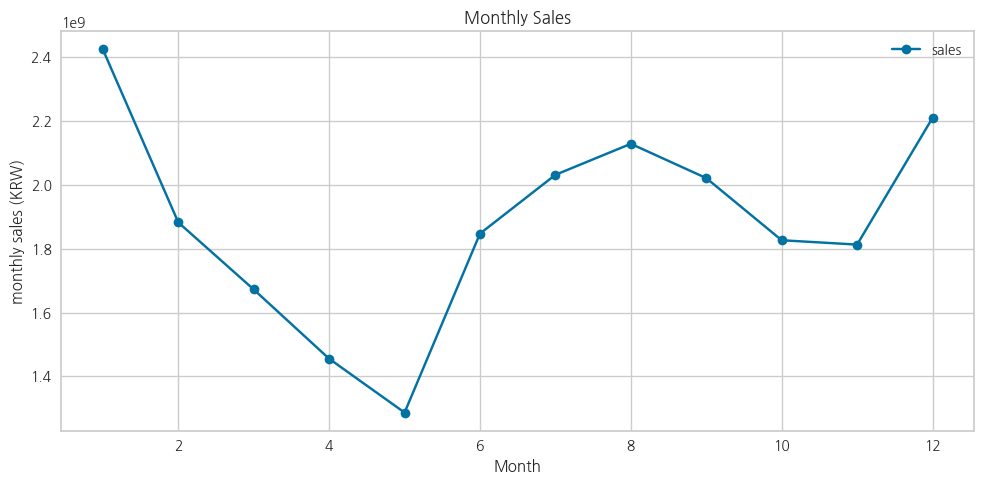

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales_sum['거래월'], monthly_sales_sum['실거래금액'], label = 'sales', marker='o')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('monthly sales (KRW)')
plt.legend()
plt.grid(True)
plt.tight_layout()

#### 월별 주문수
---
* 월별 거래금액과 비슷한 양상을 띄나, 7월~11월까지 지속적으로 하락

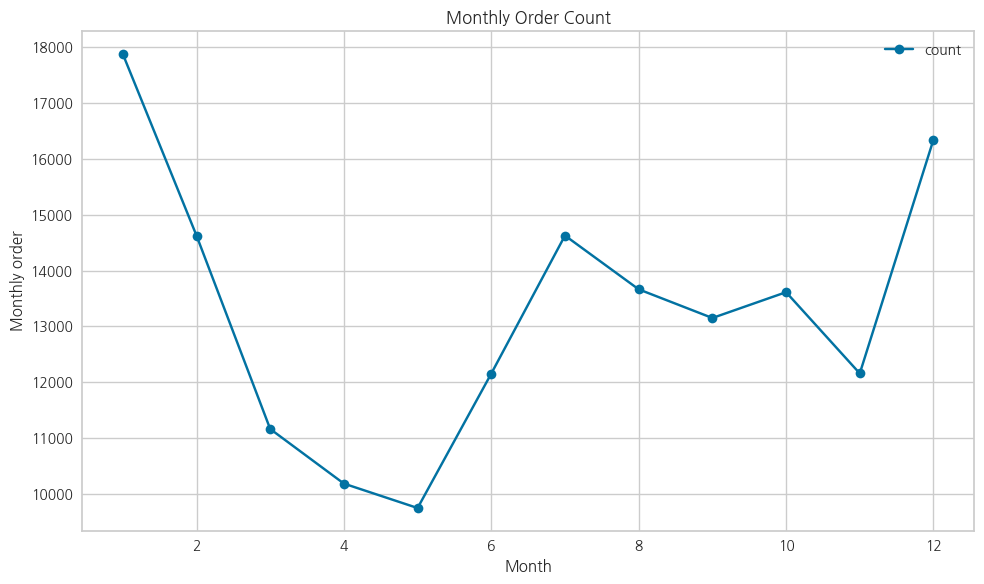

In [24]:
# 월별 주문 수 groupby
monthly_order_counts = df.groupby('거래월')['거래id'].count().reset_index(name='주문 수')

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(monthly_order_counts['거래월'], monthly_order_counts['주문 수'], label='count', marker='o')
plt.title('Monthly Order Count')
plt.xlabel('Month')
plt.ylabel('Monthly order')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

#### 월별 평균 객단가
---
* 객단가 하락구간 2월, 5월, 10월

In [25]:
# '판매가격' 컬럼에서 숫자가 아닌 값들을 NaN으로 대체
df['판매가격'] = pd.to_numeric(df['판매가격'], errors='coerce')

# NaN 값을 0으로 대체 (필요에 따라 다른 값으로 대체 가능)
df['판매가격'].fillna(0, inplace=True)

df['판매가격'] = df['판매가격'].astype('int')

In [26]:
# 거래월별 코스ID의 거래금액의 sum, 코스ID별 count
monthly_order_price = df.groupby(['거래월','코스ID'])['실거래금액'].agg(['sum','count'])

# sum은 거래금액, count는 개수 이름변경
monthly_order_price.columns = ['실거래금액','코스 수']

# 평균금액 sum/count
monthly_order_price['평균금액'] = monthly_order_price['실거래금액'] / monthly_order_price['코스 수']

# 거래월별 평균금액
monthly_order_price = monthly_order_price.groupby('거래월')['평균금액'].mean().reset_index()
monthly_order_price

,거래월,평균금액
0,1,134223.641481
1,2,126874.280119
2,3,145166.819351
3,4,142629.146781
4,5,124510.249074
5,6,146744.568746
6,7,139137.032598
7,8,147268.660335
8,9,150779.003687
9,10,134310.166062


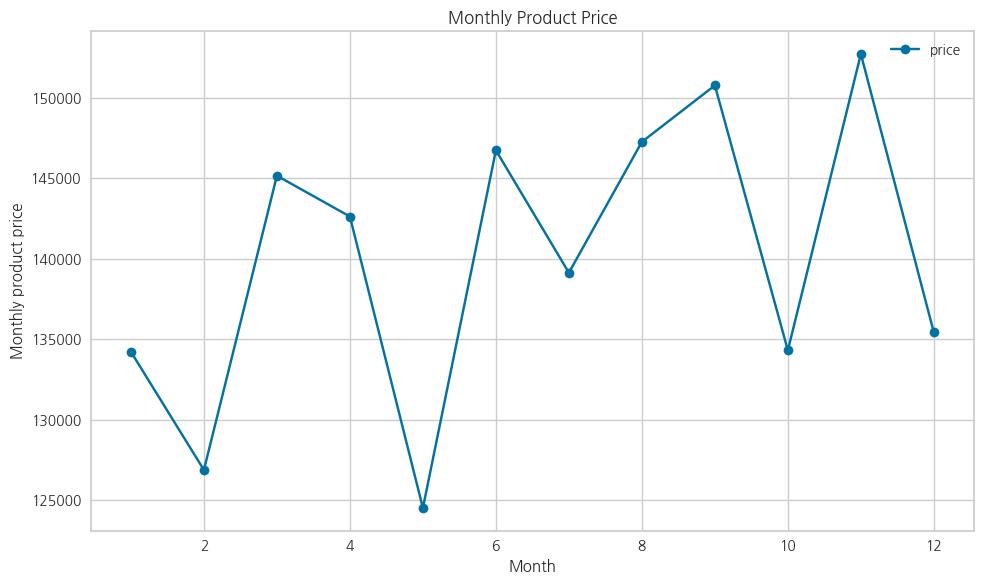

In [27]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(monthly_order_price['거래월'], monthly_order_price['평균금액'], label='price', marker='o')
plt.title('Monthly Product Price')
plt.xlabel('Month')
plt.ylabel('Monthly product price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

### 쿠폰사용
---

#### 월별 쿠폰 총비용
---
* 객단가 하락 구간인 2월, 10월은 쿠폰 사용액도 높으나, 5월은 쿠폰 사용도 미미함.   

- 5월달 판매하락 원인을 찾아보아야 함.

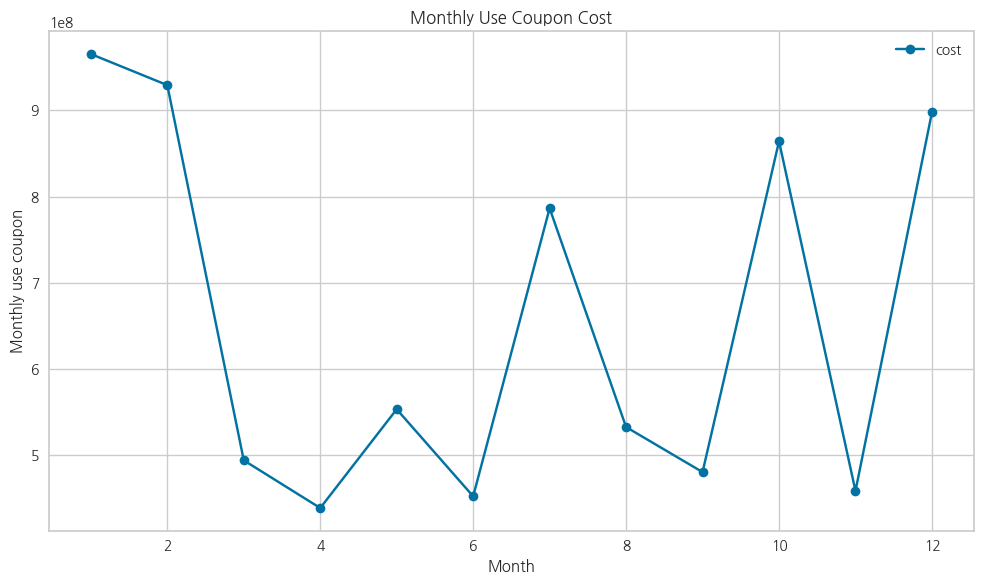

In [28]:
# 월별 쿠폰할인액 sum
monthly_coupon = df.groupby('거래월')['쿠폰할인액'].sum().reset_index()

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(monthly_coupon['거래월'], monthly_coupon['쿠폰할인액'], label='cost', marker='o')
plt.title('Monthly Use Coupon Cost')
plt.xlabel('Month')
plt.ylabel('Monthly use coupon')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

#### 월별 쿠폰 사용수
---

In [29]:
# 쿠폰사용 행이 1인 것만 count
monthly_coupon_count = df[df['쿠폰사용']==1].groupby('거래월',as_index=False)['쿠폰사용'].count()

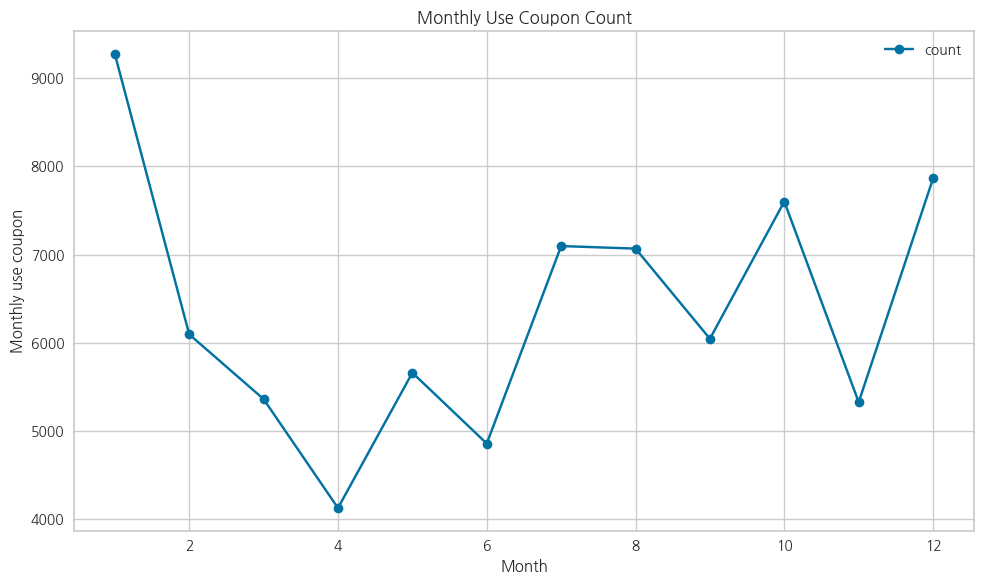

In [30]:
# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(monthly_coupon_count['거래월'], monthly_coupon_count['쿠폰사용'], label='count', marker='o')
plt.title('Monthly Use Coupon Count')
plt.xlabel('Month')
plt.ylabel('Monthly use coupon')
plt.legend()
plt.grid(True)
plt.xticks(rotation=0)
plt.tight_layout()

### 분석 결론

### 1. 문제정의
* 할인 쿠폰 프로모션을 적용했음에도, 5월, 10월달은 적자 발생.
* 쿠폰 사용 대비 주문 건수가 상승하지 않거나 상승세가 더딤

### 2. 해결방안 도출
* 주문 건수를 증대시키기 위해 고객 세분화를 실시하여, 각 고객 군집의 특징을 바탕으로 적절한 마케팅 전략을 수립해야 함.

## Session 2
## RFM지표 기획

### 0) RMF 지표

* Recency(경과일)
---

In [31]:
df['거래날짜'].min(), df['거래날짜'].max()

(Timestamp('2022-01-01 00:01:08'), Timestamp('2022-12-31 23:12:59'))

In [32]:
# 고객id별 가장 마지막 구매일
recency_df = df.groupby('고객id', as_index=False)['거래날짜'].max()
recency_df.columns = ['고객id','LastPurchaseDate']

In [33]:
# 고객의 가장 마지막 구매일로부터 몇 일이 지났는지 계산하기.
recency_df['R_경과일']=recency_df['LastPurchaseDate'].apply(lambda x: (df['거래날짜'].max() -x).days)
recency_df.drop(columns=['LastPurchaseDate'], inplace=True)

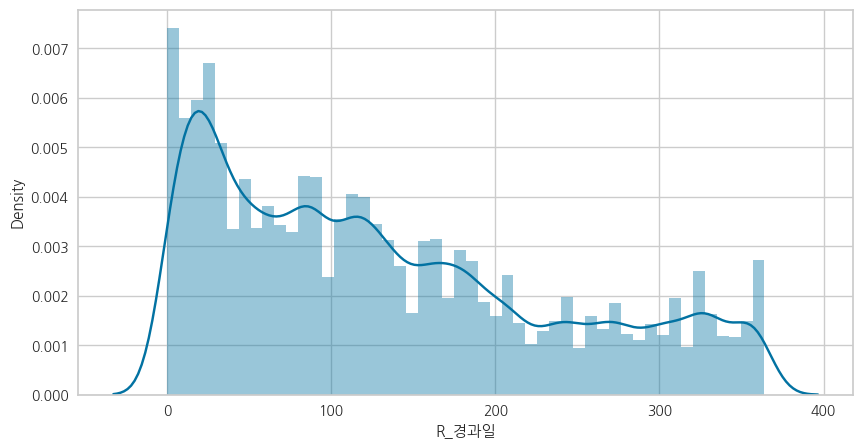

In [34]:
sns.distplot(recency_df['R_경과일'])
plt.gcf().set_size_inches(10, 5)

* Frequency(거래횟수)
---

In [35]:
# Customer ID당 유니크한 코스 ID를 1개의 주문 건으로 인식하여 얼마나 자주 구매하고 있는지를 파악
# 환불거래는 count하지 않음
frequency_df = df.copy()
frequency_df.drop_duplicates(subset=['고객id', '거래id'], keep='first', inplace=True)
frequency_df = frequency_df[frequency_df['환불금액']==0].groupby('고객id', as_index=False)['거래id'].count()
frequency_df.columns=['고객id','F_거래횟수']
frequency_df.head()

,고객id,F_거래횟수
0,0,1
1,1,1
2,6,5
3,8,3
4,9,1


* Monetary(총거래금액)
---

In [36]:
# 구매금액 = 구매개수*단가
monetary_df = df.groupby('고객id', as_index=False)['실거래금액'].sum()
monetary_df.columns=['고객id', 'M_총거래금액']
monetary_df.head()

,고객id,M_총거래금액
0,0,165000
1,1,18000
2,3,-278000
3,6,787000
4,8,555000


In [37]:
# Data merge

# recency and frequency
rf = recency_df.merge(frequency_df, how='left',on='고객id')

# monetary
rfm = rf.merge(monetary_df, how='left',on='고객id')

rfm = rfm.fillna(0)

# 고객id를 인덱스로 설정
rfm.set_index('고객id', inplace=True)

# 필요한 컬럼만 남기기
rfm = rfm[['R_경과일', 'F_거래횟수', 'M_총거래금액']]

rfm.head()

,R_경과일,F_거래횟수,M_총거래금액
고객id,,,
0,111,1.0,165000
1,138,1.0,18000
3,81,0.0,-278000
6,19,5.0,787000
8,101,3.0,555000


### 1) R,F,M 기준 설정
---

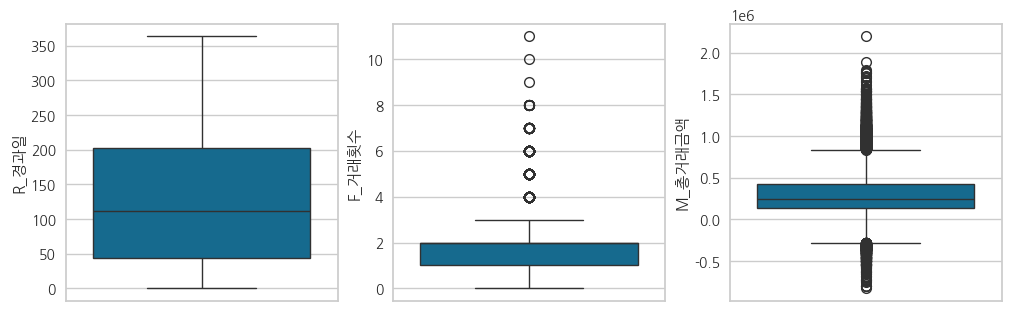

In [38]:
num_columns=len(rfm.columns)
fig, ax = plt.subplots(1, num_columns, figsize=(10, 3), constrained_layout=True)

for i, c in enumerate((rfm.columns)):
  sns.boxplot(y=rfm[c], ax=ax[i])

plt.show()

* R변수의 경우 기간별로 비교적 고르게 분포 -> qunatile 값으로 5등분 (0, 0.2, 0.4, 0.6, 0.8, 1.0)  

* F변수 & M변수의 경우 이상치 다수 존재 -> 이상치 반영해서 5등분 (0, 0.25, 0.5, 0.75, 0.75+iqrx1.5)

In [39]:
rfm.describe()

,R_경과일,F_거래횟수,M_총거래금액
count,79615.000000,79615.000000,7.961500e+04
mean,133.356692,1.861031,2.838419e+05
std,103.730427,1.076288,2.513695e+05
min,0.000000,0.000000,-8.256660e+05
25%,44.000000,1.000000,1.410000e+05
50%,112.000000,2.000000,2.426670e+05
75%,202.000000,2.000000,4.200000e+05
max,364.000000,11.000000,2.198000e+06


In [40]:
def calculated_outlier(df,column):
    iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
    out = df[column].quantile(0.75) + iqr*1.5
    return out

In [41]:
# R,F,M 구간정의
rfm['R'] = pd.qcut(rfm['R_경과일'], q = [0, 0.2,0.4, 0.6, 0.8, 1],
                              labels=[5,4,3,2,1]).astype(int)

rfm['F'] = pd.cut(rfm['F_거래횟수'], bins = [0, 1, 2, 3, calculated_outlier(rfm,'F_거래횟수'), max(rfm['F_거래횟수'])],
                              labels=[1,2,3,4,5])
rfm['F'] = rfm['F'].cat.add_categories([0]).fillna(0).astype(int)

rfm['M'] = pd.cut(rfm['M_총거래금액'], bins = [0, 141000, 242667, 420000, calculated_outlier(rfm,'M_총거래금액'), max(rfm['M_총거래금액'])],
                              labels=[1,2,3,4,5])
rfm['M'] = rfm['M'].cat.add_categories([0]).fillna(0).astype(int)
rfm.head()

,R_경과일,F_거래횟수,M_총거래금액,R,F,M
고객id,,,,,,
0,111,1.0,165000,3,1,2
1,138,1.0,18000,3,1,1
3,81,0.0,-278000,4,0,0
6,19,5.0,787000,5,5,4
8,101,3.0,555000,3,3,4


### 2) Clustering
---

In [42]:
features = rfm[['R_경과일', 'F_거래횟수','M_총거래금액']]

sc = RobustScaler() # F와 M변수에 이상치가 존재하기에 이상치에 덜 민감한 Robust 스케일링 사용
scaled_features = pd.DataFrame(sc.fit_transform(features), columns=features.columns)

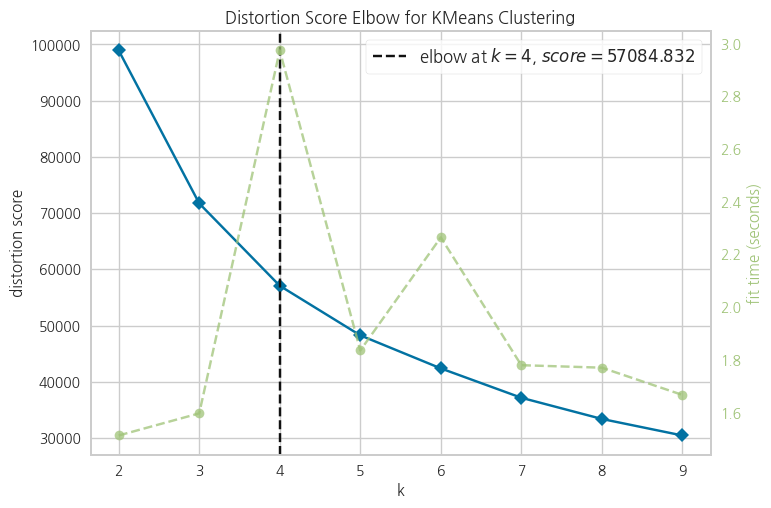

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=9, random_state=42), k=(2, 10))

In [43]:
kelbow_visualizer(KMeans(random_state=42), scaled_features, k=(2,10))

In [44]:
# 엘보우 플롯에 따라 클러스터 그룹은 4로 설정
best_k = 4

kmeans = KMeans(n_clusters = best_k, random_state = 42)
rfm['cluster'] = kmeans.fit_predict(scaled_features)
rfm.head(2)

,R_경과일,F_거래횟수,M_총거래금액,R,F,M,cluster
고객id,,,,,,,
0,111,1.0,165000,3,1,2,1
1,138,1.0,18000,3,1,1,1


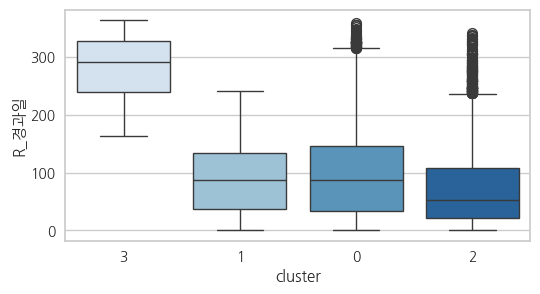

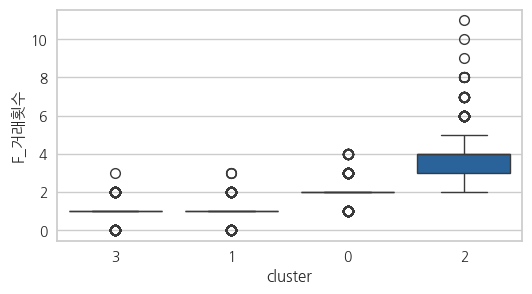

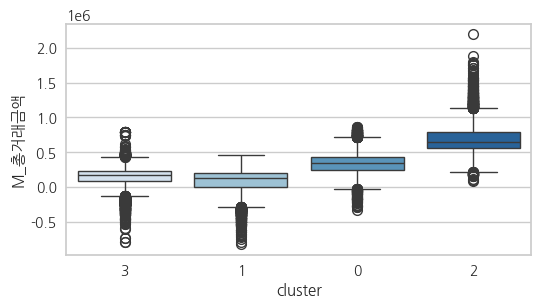

In [45]:
for i, c in enumerate(list(rfm.columns[:3])):
  plt.figure(figsize=(6, 3))
  sns.boxplot(y=rfm[c], x=rfm['cluster'], order=[3,1,0,2], palette='Blues')
  plt.show()

클러스터링 결과, 각 클러스터별로 RFM 변수 특성이 잘 나타난 것을 확인  
따라서, 클러스터 라벨을 종속변수로 활용해 가중치 설정하고자 함

### 3) RFM 가중치 설정 with Kmeans
---
1. cluster 결과를 종속변수로 설정
2. 종속변수 예측을 통해 cluster결과에 영향을 주는 변수 영향도 확인
3. feature importance를 토대로 RFM 각 변수에 대한 가중치 설정
4. 최종 RFM Score 산출

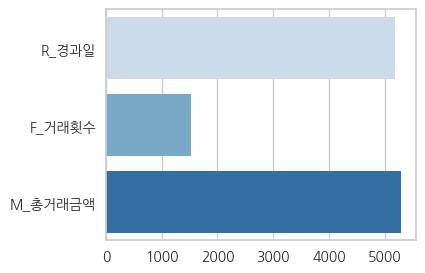

R_경과일 : 0.43
F_거래횟수 : 0.13
M_총거래금액 : 0.44


In [46]:
X = scaled_features; y=rfm['cluster']

lgbm = LGBMClassifier(random_state=42, verbose=-1)
lgbm.fit(X, y)

plt.figure(figsize=(4, 3))
sns.barplot(x=lgbm.feature_importances_, y=X.columns, palette='Blues')
plt.ylabel('')
plt.show()

# 가중치 계산
scores = lgbm.feature_importances_ / sum(lgbm.feature_importances_)
for i, c in enumerate(X.columns):
  print(f'{c} : {round(scores[i], 2)}')

In [47]:
# 고객 세분화(silver, gold, pratinum, diamond 순서)
def customer(RFM_Segment):
  if RFM_Segment <= 20:
    return 'Silver'
  elif RFM_Segment <= 40:
    return 'Silver'
  elif RFM_Segment <= 60:
    return 'Gold'
  elif RFM_Segment <= 80:
    return 'Platinum'
  else:
    return 'Diamond'

# 최종 RFM score 및 고객등급 산출
rfm['RFM_score'] = (rfm['R']*scores[0] + rfm['F']*scores[1] + rfm['M']*scores[2])/5*100
rfm['고객등급'] = rfm['RFM_score'].apply(customer)

In [48]:
rfm['고객등급'].value_counts(normalize=True).reindex(['Silver', 'Gold', 'Platinum', 'Diamond'])*100

고객등급
Silver      33.293977
Gold        30.763047
Platinum    25.495196
Diamond     10.447780
Name: proportion, dtype: float64

In [49]:
rfm.groupby('고객등급')['M_총거래금액'].sum().sort_values() / rfm['M_총거래금액'].sum()*100

고객등급
Silver      10.297588
Diamond     25.148886
Gold        26.481678
Platinum    38.071847
Name: M_총거래금액, dtype: float64

`Platinum&Diamond` 고객 수는 전체의 약 36%를 차지하나, 매출 비중은 전체의 약 64%를 자치함.  
따라서 `Platinum&Diamond` 고객군에 집중해야함 -> RFM 세그먼트 세부적으로 확인

### 4) RFM 세부 세그먼트 확인
---

In [50]:
# 세그먼트 시각화를 위한 전처리
def RFM_scale(df):
    temp = df.copy()

    # Recency
    temp['R_interval'] = pd.qcut(df['R_경과일'],
                                 q=[0, 0.2, 0.4, 0.6, 0.8, 1])
    left = temp['R_interval'].apply(lambda x: x.left).astype('float').fillna(0).astype(int)
    right = temp['R_interval'].apply(lambda x: x.right).astype('float').fillna(0).astype(int)

    df['R_scale'] = (temp['R'] - 1) + ((temp['R_경과일'] - left - 0.01) / (right - left)) - 0.0001

    # Frequency
    temp['F_interval'] = pd.cut(df['F_거래횟수'],
                                bins=[0, 1, 2, 3, calculated_outlier(df, 'F_거래횟수'), df['F_거래횟수'].max()])
    left = temp['F_interval'].apply(lambda x: x.left).astype('float').fillna(0).astype(int)
    right = temp['F_interval'].apply(lambda x: x.right).astype('float').fillna(0).astype(int)

    df['F_scale'] = (temp['F'] - 1) + ((temp['F_거래횟수'] - left - 0.01) / (right - left)) - 0.0001

    # Monetary
    temp['M_interval'] = pd.cut(df['M_총거래금액'],
                                bins=[0, 141000, 242667, 420000, calculated_outlier(df, 'M_총거래금액'), df['M_총거래금액'].max()])
    left = temp['M_interval'].apply(lambda x: x.left).astype('float').fillna(0).astype(int)
    right = temp['M_interval'].apply(lambda x: x.right).astype('float').fillna(0).astype(int)

    df['M_scale'] = (temp['M'] - 1) + ((temp['M_총거래금액'] - left) / (right - left)) - 0.0001

    return df


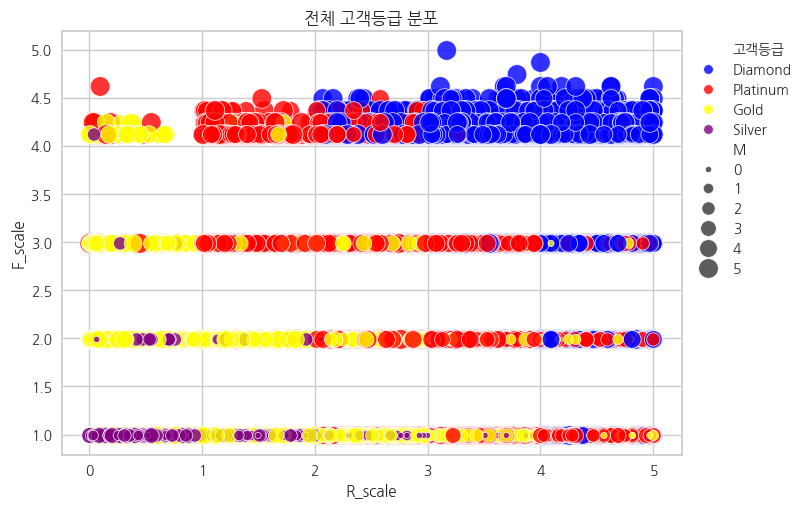

In [51]:
segment= RFM_scale(rfm)

# 고객 등급별 색상 지정
palette = {
    'Diamond': 'blue',
    'Platinum': 'red',
    'Gold': 'yellow',
    'Silver': 'purple',
}
sns.scatterplot(x = segment['R_scale'], y = segment['F_scale'], alpha = 0.8
                ,size = segment['M'], sizes = (20,200)
                ,hue = segment['고객등급'], hue_order = ['Diamond','Platinum','Gold','Silver']
               , palette=palette)
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.title('전체 고객등급 분포')
plt.show()

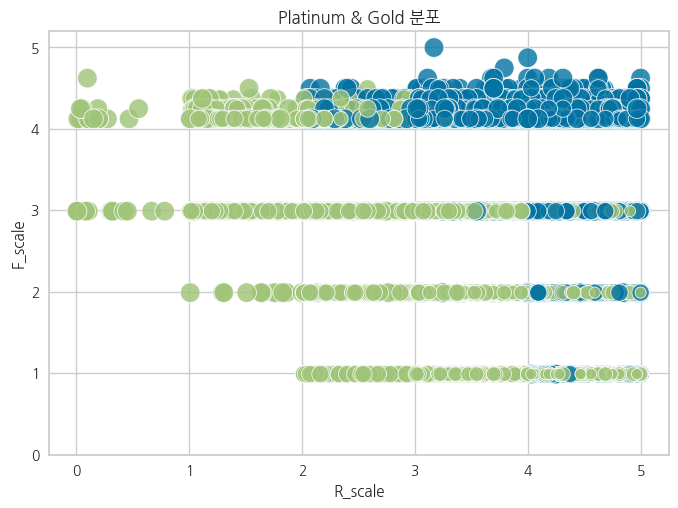

In [52]:
vip_segment = segment[segment['고객등급'].isin(['Platinum','Diamond'])]
sns.scatterplot(x = vip_segment['R_scale'], y = vip_segment['F_scale'], alpha = 0.8
                ,size = vip_segment['M'], sizes = (20,200), size_norm = (1,5)
                ,hue = vip_segment['고객등급'], legend = False
               )

plt.yticks([0,1,2,3,4,5])
# plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.title('Platinum & Gold 분포')
plt.show()

`Platinum & Diamond` 고객군은 주로 우상단에 분포함  
그러나, RFM 값이 다소 낮은 고객들도 존재  
좀 더 세밀한 분석을 위해 고객군 세분화 필요

In [53]:
def make_segment(r_interval,f_interval,m_interval):
    r_left, r_right = r_interval
    f_left, f_right = f_interval
    m_left, m_right = m_interval

    segment_idx = vip_segment['RFM_segment'].apply(lambda x: all([
                                                           r_left <= int(x[0])<= r_right
                                                          ,f_left <= int(x[1])<= f_right
                                                          ,m_left <= int(x[2])<= m_right
    ]))
    return segment_idx

In [54]:
vip_segment = segment[segment['고객등급'].isin(['Platinum','Diamond'])]
vip_segment['RFM_segment'] = vip_segment['R'].map(str) + vip_segment['F'].map(str) + vip_segment['M'].map(str)
vip_segment['customer_segment'] = '기타'

# 고객 세그먼트 분류
vip = make_segment((4,5),(4,5),(4,5)) # R,F,M 모두 4 이상인 그룹
churn = make_segment((1,3),(3,5),(3,5)) # RR이 저조한 그룹(R<=3)
potential = make_segment((3,5),(1,3),(3,5)) # F가 저조한 그룹(F<=3)
loyal = make_segment((3,5),(3,5),(1,3)) # M이 저조한 그룹(M<=3)

vip_segment.loc[vip, 'customer_segment'] = 'VIP'
vip_segment.loc[churn, 'customer_segment'] = '이탈위험고객'
vip_segment.loc[loyal, 'customer_segment'] = '충성고객'
vip_segment.loc[potential, 'customer_segment'] = '가망고객'

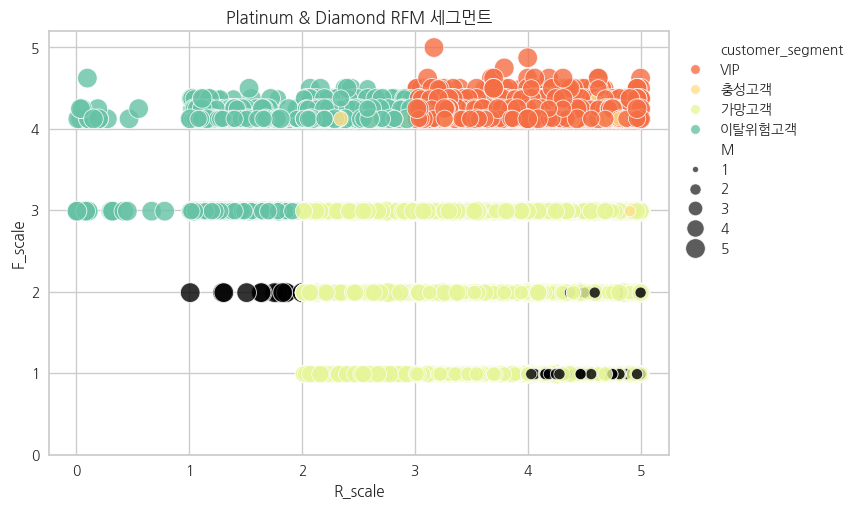

In [55]:
sns.scatterplot(x = vip_segment['R_scale'], y = vip_segment['F_scale'], alpha = 0.8
                ,size = vip_segment['M'], sizes = (20,200), size_norm = (1,5)
                ,hue = vip_segment['customer_segment'], palette='Spectral'
                ,hue_order = ['VIP','충성고객','가망고객','이탈위험고객']
                ,legend = True
               )
plt.legend(loc = 'upper left', bbox_to_anchor=(1, 1))
plt.yticks([0,1,2,3,4,5])
plt.title('Platinum & Diamond RFM 세그먼트')
plt.show()

- `VIP`: R,F,M 모두 4 이상인 그룹
- `이탈위험고객`: R이 저조한 그룹(R<=3)
- `가망고객`: F가 저조한 그룹(F<=3)
- `충성고객`: M이 저조한 그룹(M<=3)

## Session 3
## 세그먼트별 서비스 이용 수준에 따른 전략 제시

In [56]:
dat_raw = df.copy()
dat_cohort = dat_raw.merge(vip_segment.reset_index()[['고객id','고객등급','customer_segment']], how='left', on = '고객id')
dat_cohort = dat_cohort[dat_cohort['고객등급'].isin(['Platinum','Diamond'])]
dat_cohort = dat_cohort[dat_cohort['실거래금액'] >=0]

### EDA
---

* 환불고객
---

In [57]:
# 환불고객 필터링한 df 생성
dat_raw = df.copy()
dat_cohort_temp = dat_raw.merge(vip_segment.reset_index()[['고객id','고객등급','customer_segment']], how='left', on = '고객id')
dat_cohort_temp = dat_cohort_temp[dat_cohort_temp['고객등급'].isin(['Platinum','Diamond'])]
dat_refund = dat_cohort_temp[dat_cohort_temp['실거래금액'] <0]
len(dat_refund)/159328*100

1.2784946776461137

* Platinum&Diamond 그룹의 환불률은 1.2%

In [58]:
# 세그먼트별 환불고객
dat_refund.groupby('customer_segment')['고객id'].count()

customer_segment
VIP        362
가망고객      1016
기타         237
이탈위험고객     120
충성고객       302
Name: 고객id, dtype: int64

* 결제수단
---

In [59]:
# customer_segment별 결제수단 비율
dat_cohort.groupby('customer_segment')['결제수단'].value_counts(normalize=True).unstack().fillna(0)*100

결제수단,CARD,POINT,PROMOTION,TRANS,TRANSFER,VBANK
customer_segment,,,,,,
VIP,69.398135,13.947443,8.200057,4.108505,1.424131,2.921729
가망고객,72.444403,13.680706,4.732073,4.387628,1.560405,3.194785
기타,65.142388,12.431544,13.444688,4.791895,1.423877,2.765608
이탈위험고객,71.214421,14.620493,6.299810,3.121442,1.489564,3.254269
충성고객,53.806334,13.093788,26.674787,3.532278,0.700365,2.192448


In [60]:
# 충성고객에게 어떤 프로모션이 진행되었는지 대략 확인
loyal_df = dat_cohort[dat_cohort['customer_segment']=='충성고객']
loyal_df[loyal_df['결제수단']=='PROMOTION']['카테고리'].value_counts(normalize=True)*100
loyal_pro_df = loyal_df[loyal_df['결제수단']=='PROMOTION']

* 포맷
---

In [61]:
# customer_segment별 프리미엄 강의 구매 비율
dat_cohort.groupby('customer_segment')['포맷'].value_counts(normalize=True).unstack().fillna(0)*100

포맷,RED,올인원
customer_segment,,
VIP,8.115287,91.884713
가망고객,8.562578,91.437422
기타,5.257393,94.742607
이탈위험고객,8.472486,91.527514
충성고객,4.963459,95.036541


In [62]:
dat_cohort[dat_cohort['포맷']=='RED']['카테고리'].value_counts(normalize=True)*100

카테고리
프로그래밍       31.042580
마케팅         25.485285
데이터 사이언스    22.401378
부동산/금융       6.653100
업무 생산성       5.447714
영상/3D        4.711960
디자인          4.257984
Name: proportion, dtype: float64

### 1. VIP
---
- 요일별 방문빈도 및 평균 매출액 분석

In [63]:
import calendar
dat_cohort['요일'] = dat_cohort['거래날짜'].dt.weekday
dat_cohort['요일'] = dat_cohort['요일'].apply(lambda x: calendar.day_name[x])

In [64]:
# 라벨 순서 지정
label_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dat_cohort['요일'] = pd.Categorical(dat_cohort['요일'], categories=label_order, ordered=True)

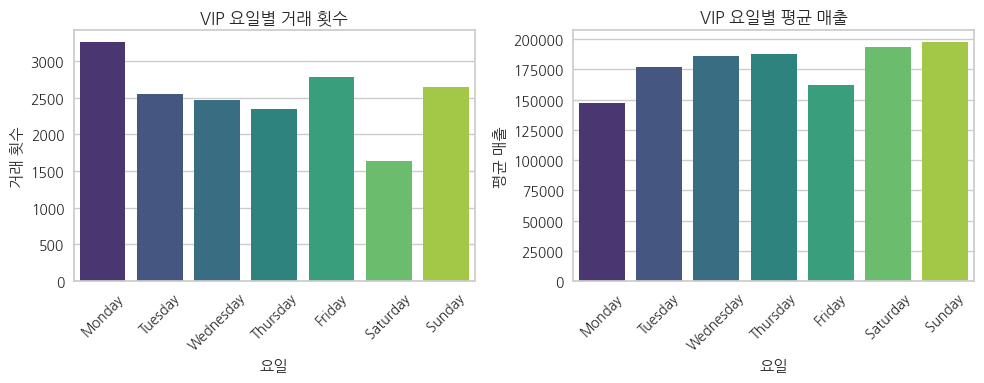

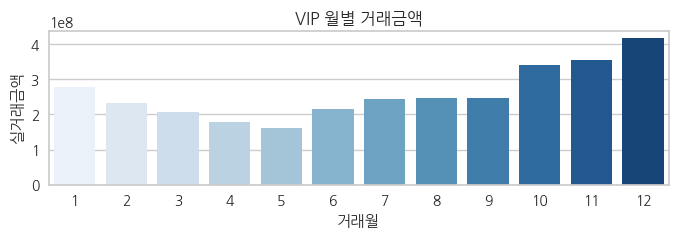

In [65]:
################ 요일별 거래 횟수 vs 요일별 매출 ################
fig, ax = plt.subplots(1, 2, figsize=(10,4))
vip_cohort = dat_cohort[dat_cohort['customer_segment'] == 'VIP']
# 요일별 거래 횟수
day_counts = vip_cohort['요일'].value_counts() # 요일별 거래 횟수 계산
sns.barplot(x=day_counts.index, y=day_counts.values,
            order = label_order, ax=ax[0], palette='viridis')
ax[0].set_title('VIP 요일별 거래 횟수')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('요일')
ax[0].set_ylabel('거래 횟수')

# 요일별 매출
sales_counts = vip_cohort.groupby('요일')['실거래금액'].mean() # 요일별 평균 매출 계산
sns.barplot(x=sales_counts.index, y=sales_counts.values,
            order = label_order, ax=ax[1], palette='viridis')
ax[1].set_title('VIP 요일별 평균 매출')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel('요일')
ax[1].set_ylabel('평균 매출')

plt.tight_layout()
plt.show()


# VIP고객 월별 거래금액
plt.figure(figsize = (8,2))
temp = vip_cohort.groupby('거래월')['실거래금액'].sum()
sns.barplot(temp, palette='Blues')

plt.title('VIP 월별 거래금액')
plt.show()

요일별 거래 횟수 및 평균 매출 분석 결과, `토`의 거래 횟수는 적은 편이지만 평균 매출이 높음    
따라서, `토`에 대한 홍보 확대 방안 제시
또한 월별 거래금액 분석 결과, `6월부터 12월까지` 거래금액이 증가하는 경향이 있음.  
> 해당 시기에 `VIP 전용 프로모션` 진행

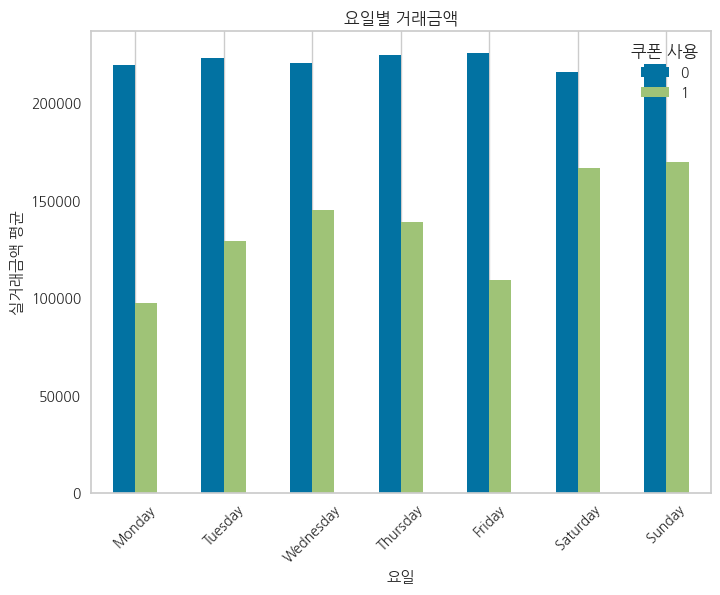

In [66]:
# 요일별 거래금액을 mean하고 쿠폰사용 시각화
sum_df = vip_cohort.groupby(['요일','쿠폰사용'])['실거래금액'].mean().unstack(fill_value=0)

# 그래프 생성
sum_df.plot(kind='bar', figsize=(8,6))

plt.title('요일별 거래금액')
plt.xlabel('요일')
plt.ylabel('실거래금액 평균')
plt.legend(title='쿠폰 사용')
plt.tick_params(axis='x', rotation=45)
plt.grid(axis='y')
plt.show()

Text(0, 0.5, '비율')

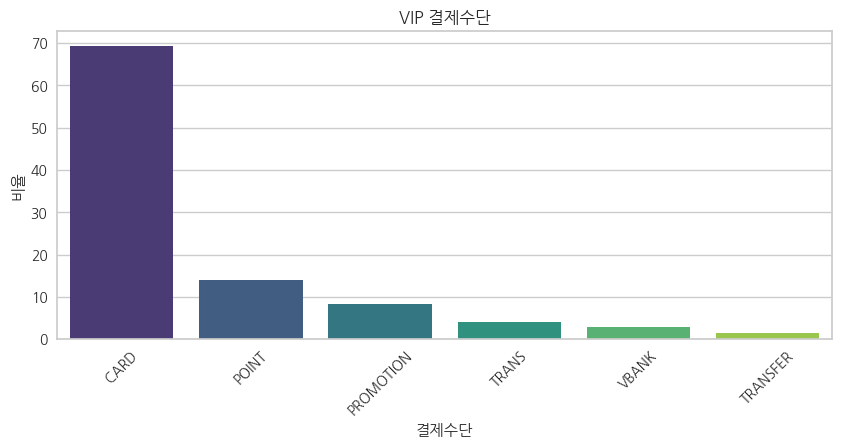

In [67]:
### VIP 결제수단
payment_df = vip_cohort['결제수단'].value_counts(normalize=True)*100

# 시각화
plt.figure(figsize=(10,4))
sns.barplot(payment_df, palette='viridis')
plt.title('VIP 결제수단')
plt.tick_params(axis='x', rotation=45)
plt.xlabel('결제수단')
plt.ylabel('비율')


* 결제수단 분석결과, Card 사용 다음으로 Point사용 비율이 높은편.
> 특정 카드사나 결제수단 결제 시, `추가 할인 또는 포인트` 적립 제공



### 2. 충성고객
---
- 충성고객의 거래금액 증대 방안 제시
- 요일별 쿠폰 사용횟수 및 쿠폰사용액 확인
- 충성고객 월별 리텐션 및 매출 비중 확인
- 재방문율 높은 월의 인기 카테고리 확인해 재방문 요소 분석
- 재방문 요소에 따른 크로스 셀링 전략 제시

In [68]:
loyal_cohort = dat_cohort[dat_cohort['customer_segment'] == '충성고객']

Text(0, 0.5, '비율')

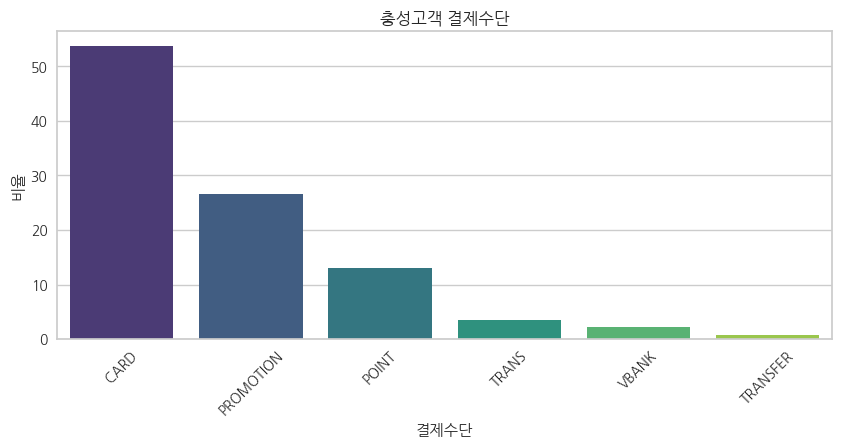

In [69]:
### 충성고객 결제수단
payment_df = loyal_cohort['결제수단'].value_counts(normalize=True)*100

# 시각화
plt.figure(figsize=(10,4))
sns.barplot(payment_df, palette='viridis')
plt.title('충성고객 결제수단')
plt.tick_params(axis='x', rotation=45)
plt.xlabel('결제수단')
plt.ylabel('비율')


In [70]:
label_order

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

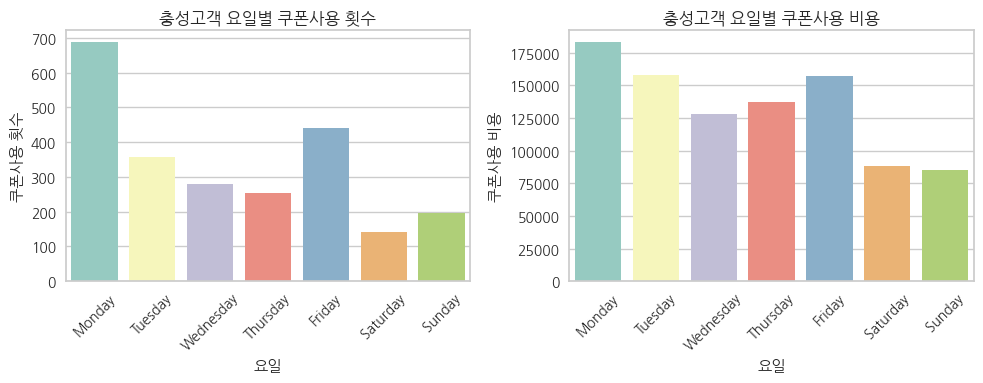

In [71]:
################ 요일별 쿠폰사용 횟수 VS 쿠폰사용 비용 ################
# 요일별 쿠폰사용 횟수
fig, ax = plt.subplots(1, 2, figsize=(10,4))

day_counts = loyal_cohort[loyal_cohort['쿠폰사용'] == 1]['요일'].value_counts().reindex(label_order) # 요일별 쿠폰사용 횟수 계산
sns.barplot(x=day_counts.index, y=day_counts.values, order=label_order, ax=ax[0], palette='Set3')
ax[0].set_title('충성고객 요일별 쿠폰사용 횟수')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('요일')
ax[0].set_ylabel('쿠폰사용 횟수')

# 요일별 매출
sales_counts = loyal_cohort[loyal_cohort['쿠폰사용'] == 1].groupby('요일')['쿠폰할인액'].mean().reindex(label_order) # 요일별 쿠폰사용 비용 계산
sns.barplot(x=sales_counts.index, y=sales_counts.values, order=label_order, ax=ax[1], palette='Set3')
ax[1].set_title('충성고객 요일별 쿠폰사용 비용')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel('요일')
ax[1].set_ylabel('쿠폰사용 비용')

plt.tight_layout()
plt.show()

In [72]:
mon_order = ['']

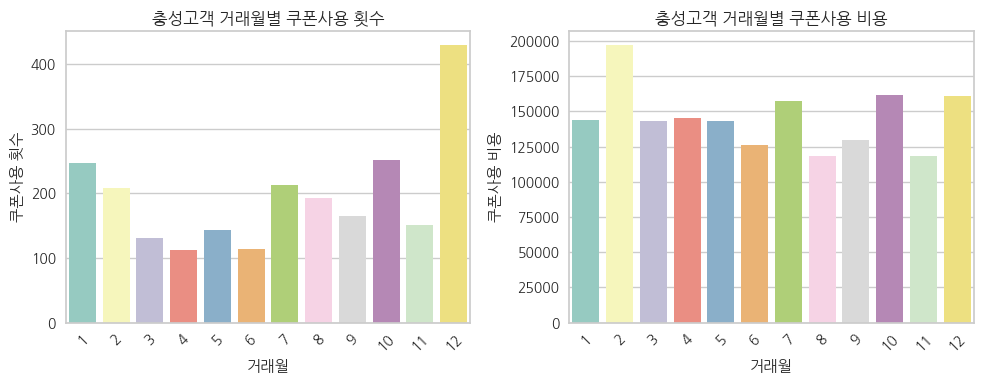

In [73]:
################ 거래월별 쿠폰사용 횟수 VS 쿠폰사용 비용 ################
# 거래월별 쿠폰사용 횟수
fig, ax = plt.subplots(1, 2, figsize=(10,4))

mon_counts = loyal_cohort[loyal_cohort['쿠폰사용'] == 1]['거래월'].value_counts().reindex() # 거래월별 쿠폰사용 횟수 계산
sns.barplot(x=mon_counts.index, y=mon_counts.values, ax=ax[0], palette='Set3')
ax[0].set_title('충성고객 거래월별 쿠폰사용 횟수')
ax[0].tick_params(axis='x', rotation=45)
ax[0].set_xlabel('거래월')
ax[0].set_ylabel('쿠폰사용 횟수')

# 거래월별 매출
mon_sales_counts = loyal_cohort[loyal_cohort['쿠폰사용'] == 1].groupby('거래월')['쿠폰할인액'].mean().reindex() # 거래월별 쿠폰사용 비용 계산
sns.barplot(x=mon_sales_counts.index, y=mon_sales_counts.values, ax=ax[1], palette='Set3')
ax[1].set_title('충성고객 거래월별 쿠폰사용 비용')
ax[1].tick_params(axis='x', rotation=45)
ax[1].set_xlabel('거래월')
ax[1].set_ylabel('쿠폰사용 비용')

plt.tight_layout()
plt.show()

In [74]:
def plot_retention(df):

    # 첫거래월 -> Cohort
    first_month = pd.DataFrame(df.groupby('고객id',as_index=False)['거래월'].min())
    df = df.merge(first_month, on='고객id', how='left')
    df = df.rename(columns = {'거래월_y':'Cohort'})
    df = df.rename(columns = {'거래월_x':'거래월'})

    # 월단위 리텐션
    dat_retention = df.groupby(['Cohort','거래월'],as_index=False).agg({'고객id': pd.Series.nunique})
    dat_retention['경과월'] = dat_retention['거래월']-dat_retention['Cohort']

    first_month_users = dat_retention.groupby('Cohort')['고객id'].first()
    dat_retention = dat_retention.pivot_table('고객id','Cohort','경과월')
    dat_retention = dat_retention.T.divide(first_month_users.to_list()).T.fillna(0)

    mask = np.array(list(map(lambda x: list(np.flip(x)), np.tril(np.ones_like(dat_retention, dtype=bool), k=-1))))

    return sns.heatmap(dat_retention
                       ,mask = mask
                       ,annot=True, fmt='.0%', cmap = 'Blues')

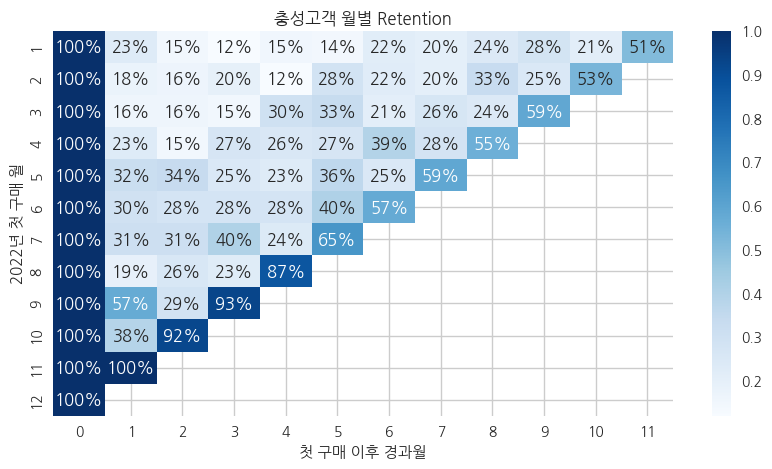

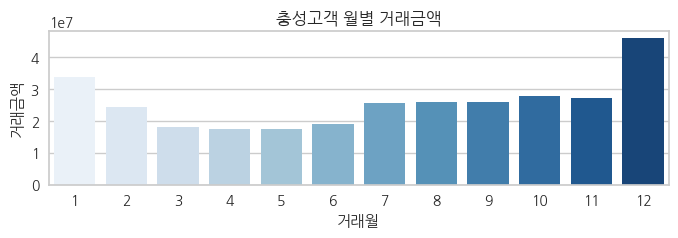

In [75]:
loyal_cohort = dat_cohort[dat_cohort['customer_segment'] == '충성고객']

# 충성고객 월별 Retention
plt.figure(figsize = (10,5))
plot_retention(loyal_cohort)

plt.title('충성고객 월별 Retention')
plt.ylabel('2022년 첫 구매 월')
plt.xlabel('첫 구매 이후 경과월')
plt.show()

# 충성고객 월별 거래금액
plt.figure(figsize = (8,2))
temp = loyal_cohort.groupby('거래월')['거래금액'].sum()
sns.barplot(temp, palette='Blues')

plt.title('충성고객 월별 거래금액')
plt.show()

12월을 제외한 충성고객의 경우 주로 `9,10,11월`에 재방문하는 것을 확인  
또한, 충성고객의 매출 대부분 하반기에 집중  
따라서, `9,10,11월` 충성고객의 구매 카테고리를 확인해 인기 카테고리에 대한 프로모션 제안

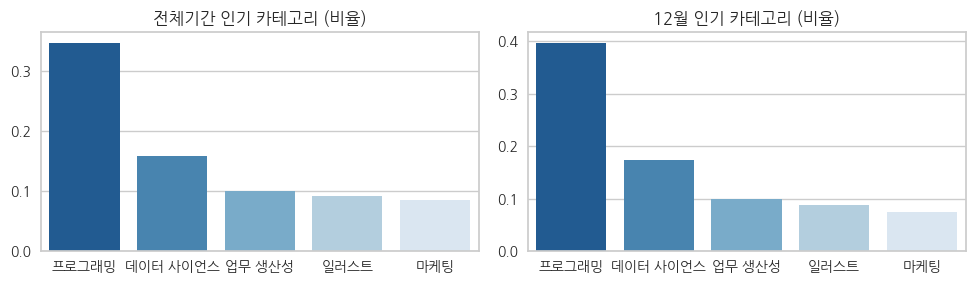

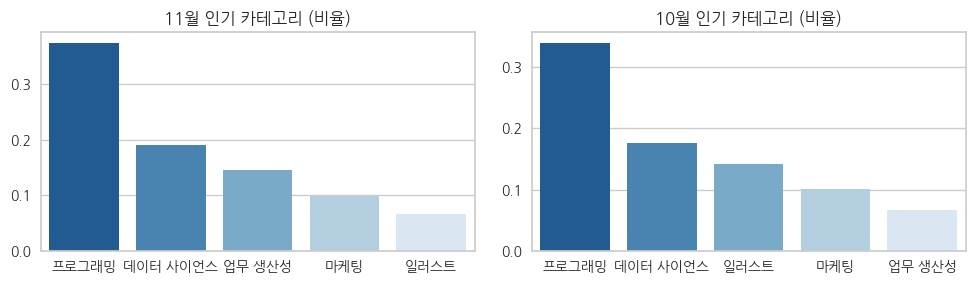

In [76]:
# 상위 5개 카테고리 확인 (전체기간 vs 12월)
fig,ax = plt.subplots(1,2, figsize = (10,3))

pop_category = loyal_cohort['카테고리'].value_counts(normalize = True)

sns.barplot(x=pop_category[:5].index, y=pop_category[:5]
            , ax = ax[0], palette = 'Blues_r')
ax[0].set_title('전체기간 인기 카테고리 (비율)')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

pop_category = loyal_cohort[loyal_cohort['거래월'] == 12]['카테고리'].value_counts(normalize = True)
sns.barplot(x=pop_category[:5].index, y=pop_category[:5]
            , ax = ax[1], palette = 'Blues_r')
ax[1].set_title('12월 인기 카테고리 (비율)')
ax[1].set_ylabel('')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()

# 상위 5개 카테고리 확인 (전체기간 vs 12월)
fig,ax = plt.subplots(1,2, figsize = (10,3))

pop_category = loyal_cohort[loyal_cohort['거래월'] == 11]['카테고리'].value_counts(normalize = True)
sns.barplot(x=pop_category[:5].index, y=pop_category[:5]
            , ax = ax[0], palette = 'Blues_r')
ax[0].set_title('11월 인기 카테고리 (비율)')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

pop_category = loyal_cohort[loyal_cohort['거래월'] == 10]['카테고리'].value_counts(normalize = True)
sns.barplot(x=pop_category[:5].index, y=pop_category[:5]
            , ax = ax[1], palette = 'Blues_r')
ax[1].set_title('10월 인기 카테고리 (비율)')
ax[1].set_ylabel('')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()

전체 기간에 비해 9-11월에 `프로그래밍&데이터사이언스&업무생산성` 의 비중이 증가  
해당 카테고리와 9-11월 재방문이 연관이 있을 것으로 추정  
따라서, 9-11월월에 집중적으로 `프로그래밍&데이터사이언스&업무생산성` 홍보 및 크로스 셀링 전략 제안

### 3. 가망고객
---
- 가망고객의 방문 빈도 증가를 위한 방안 제시
- 연관 규칙 분석을 통해 연관 카테고리 확인
- 연관 카테고리 함께 구매 시 할인 적용하는 프로모션 제공
- 프로모션을 통한 방문 활성화
- 환불 방지를 위한 구매경험 향상

In [77]:
def cross_selling(df):
    dat_association = df.groupby(['고객id', '카테고리'])['코스ID'].count().unstack().fillna(0)
    dat_association[dat_association > 0] = 1

    # 지지도 계산
    frequent_itemsets = apriori(dat_association, min_support=0.08, use_colnames=True)
    association_rules_df = association_rules(frequent_itemsets, metric='lift', min_threshold=0.7)

    return association_rules_df.sort_values('lift',ascending = False)

In [78]:
potential_cohort = dat_cohort[dat_cohort['customer_segment'] == '가망고객']
cross = cross_selling(potential_cohort)[:5][['antecedents','consequents','support','confidence','lift']]
cross

,antecedents,consequents,support,confidence,lift
3,(프로그래밍),(영상/3D),0.082331,0.144302,0.803308
2,(영상/3D),(프로그래밍),0.082331,0.458321,0.803308
1,(프로그래밍),(데이터 사이언스),0.173264,0.303684,0.791198
0,(데이터 사이언스),(프로그래밍),0.173264,0.451412,0.791198
5,(프로그래밍),(일러스트),0.103893,0.182096,0.786683


연관분석 결과, `데이터사이언스`와 `프로그래밍`를 함께 거래한 비율이 17%이며,
`프로그래밍`이 거래된경우, `데이터 사이언스`도 거래된 비율이 45%임.
`프로그래밍`이 거래될 때 `데이터사이언스`가 거래된 확률은 데이터사이언스가 단독으로 발생할 확률의 0.79배   
따라서, `데이터사이언스 & 프로그래밍` 묶음 상품에 대한 할인 프로모션 제안

In [79]:
potential_re = dat_refund[dat_refund['customer_segment']=='가망고객']

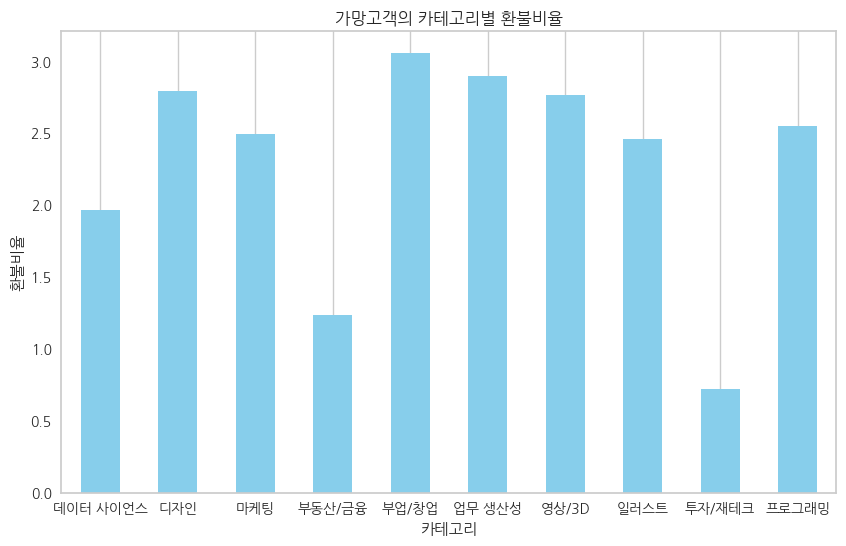

In [80]:
# 판매대비 환불률 데이터 프레임 생성
sales_count = potential_cohort.groupby('카테고리')['거래id'].count().rename('판매횟수')
refund_count = potential_re.groupby('카테고리')['거래id'].count().rename('환불횟수')

re_df = pd.concat([sales_count, refund_count], axis=1).fillna(0)
re_df['환불비율']= re_df['환불횟수']/re_df['판매횟수']*100

# 환불비율 시각화
plt.figure(figsize=(10, 6))
re_df['환불비율'].plot(kind='bar', color='skyblue')
plt.title('가망고객의 카테고리별 환불비율')
plt.xlabel('카테고리')
plt.ylabel('환불비율')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [81]:
1016/2037

0.498772704958272

* 가망고객은 전체 고객 중 `환불 비율이 49%`이므로, 환불 고객 관리가 필요함.   
* 카테고리별 환불비율을 분석한 결과, `부업/창업, 업무생산성, 영상/3D`의 환불률이 가장 많았으며,
 해당 카테고리 강의에 대한 환불 사유를 분석하고 양질의 컨텐츠를 제작할 필요가 있음.

### 4. 이탈위험고객
---
- 이탈위험고객군 재활성화를 위한 방안 제시
- 인기 카테고리 파악
- 인기 카테고리에 대한 프로모션 진행
- 프로모션을 통한 재활성화

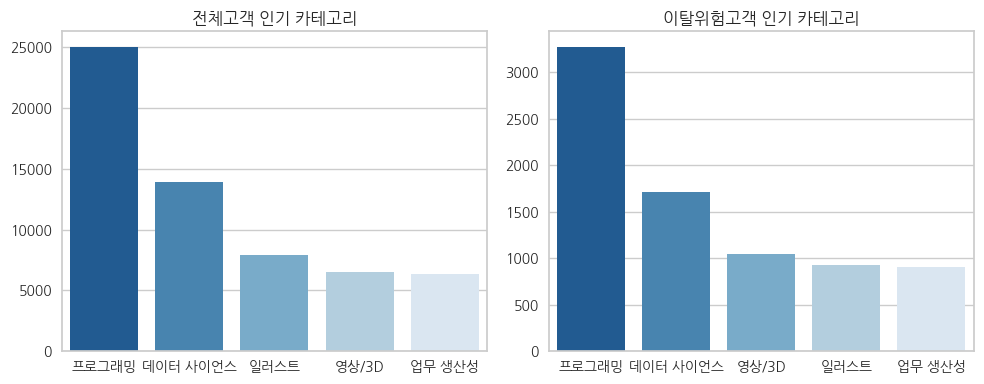

In [82]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
churn_cohort = dat_cohort[dat_cohort['customer_segment'] == '이탈위험고객']

# 전체고객 인기 카테고리
temp = dat_cohort['카테고리'].value_counts()[:5]
sns.barplot(x=temp.index, y=temp.values, ax=ax[0], palette='Blues_r')
ax[0].set_title('전체고객 인기 카테고리')
ax[0].set_xlabel('')

# 이탈위험고객 인기 카테고리
temp = churn_cohort['카테고리'].value_counts()[:5]
sns.barplot(x=temp.index, y=temp.values, ax=ax[1], palette='Blues_r')
ax[1].set_title('이탈위험고객 인기 카테고리')
ax[1].set_xlabel('')

plt.tight_layout()
plt.show()

인기 카테고리 분석 결과, 이탈위험고객의 경우 대표상품인 `프로그래밍` 을 주로 구매함   
따라서, `프로그래밍` 제품에 대한 프로모션 진행 (사은품 혹은 특별 할인 쿠폰 제공)